In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/StartupCampus/class'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/StartupCampus/class/customer.csv
/content/drive/MyDrive/StartupCampus/class/product.csv
/content/drive/MyDrive/StartupCampus/class/transactions.csv
/content/drive/MyDrive/StartupCampus/class/click_stream.csv


In [ ]:
raw_path = '/content/drive/MyDrive/StartupCampus/class/'
df_customer = pd.read_csv(raw_path + 'customer.csv')
df_product = pd.read_csv(raw_path + 'product.csv', error_bad_lines=False)
df_transactions = pd.read_csv(raw_path + 'transactions.csv')
df_clickstream = pd.read_csv(raw_path + 'click_stream.csv')
list_data = [df_customer, df_product, df_transactions, df_clickstream]

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

#Checking Jumlah Missing Value

In [ ]:
for i in list_data:
    print(i.isna().sum())

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64
id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64
created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
product_metadata               0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                526048
shipment_fee                   0
shipment_date_limit     

#Checking Duplicated pada Dataset

In [ ]:
for i in list_data:
    print(i.duplicated(keep=False).sum())

0
0
0
0


#Data Preparation

In [ ]:
df_product.rename(columns = {"id": "product_id"}, inplace = True)

In [ ]:
df_product.head()

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
df_clickstream.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


In [ ]:
df_clickstream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [ ]:
df_transactions.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753


In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [ ]:
df_customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [ ]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

#Checking Outliers Pada Tabel Total Amount(Transactions) dengan InterQuantile

In [ ]:
q1, q3= np.percentile(df_transactions['total_amount'],[25,75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
out_list = df_transactions.index[(df_transactions['total_amount'] < lower_bound) | (df_transactions['total_amount'] > upper_bound)]
out_list = sorted(set(out_list))
print('Ada ' + str(len(out_list)) + ' outliers yang terdeteksi')

Ada 103329 outliers yang terdeteksi


#Cleaning Data

##Merubah nilai Null pada tabel df_transactions (promo_code) menjadi 'No Promo'

In [ ]:
df_transactions.fillna('No Promo',inplace=True)
df_transactions.isna().sum()

created_at                0
customer_id               0
booking_id                0
session_id                0
product_metadata          0
payment_method            0
payment_status            0
promo_amount              0
promo_code                0
shipment_fee              0
shipment_date_limit       0
shipment_location_lat     0
shipment_location_long    0
total_amount              0
dtype: int64

##Melakukan Clean pada table df_product

###Mengubah format float pada year menjadi datetime pada table df_product

In [ ]:
df_product['year'] = pd.to_datetime(df_product['year'], format = '%Y')
df_product.head(2)

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011-01-01,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012-01-01,Casual,Peter England Men Party Blue Jeans


In [ ]:
df_product['year'] = df_product['year'].dt.strftime('%Y')
df_product.head(2)

,product_id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans


###Drop Missing Value pada kolom year (Karena hanya 1 missing value)

In [ ]:
df_product.dropna(subset=['year'], inplace = True)
df_product.isna().sum()

product_id              0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 20
year                    0
usage                 317
productDisplayName      7
dtype: int64

###Mengganti Value dengan Value sebelumnya pada kolom baseColour

In [ ]:
df_product['baseColour'].unique()

array(['Navy Blue', 'Blue', 'Silver', 'Black', 'Grey', 'Green', 'Purple',
       'White', 'Beige', 'Brown', 'Bronze', 'Teal', 'Copper', 'Pink',
       'Off White', 'Maroon', 'Red', 'Khaki', 'Orange', 'Coffee Brown',
       'Yellow', 'Charcoal', 'Gold', 'Steel', 'Tan', 'Multi', 'Magenta',
       'Lavender', 'Sea Green', 'Cream', 'Peach', 'Olive', 'Skin',
       'Burgundy', 'Grey Melange', 'Rust', 'Rose', 'Lime Green', 'Mauve',
       'Turquoise Blue', 'Metallic', 'Mustard', 'Taupe', 'Nude',
       'Mushroom Brown', nan, 'Fluorescent Green'], dtype=object)

In [ ]:
df_product['baseColour'].fillna(method='pad', inplace = True)

In [ ]:
df_product.isna().sum()

product_id              0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour              0
season                 20
year                    0
usage                 317
productDisplayName      7
dtype: int64

###Mengganti Value dengan Value sebelumnya pada kolom season

In [ ]:
df_product['season'].unique()

array(['Fall', 'Summer', 'Winter', 'Spring', nan], dtype=object)

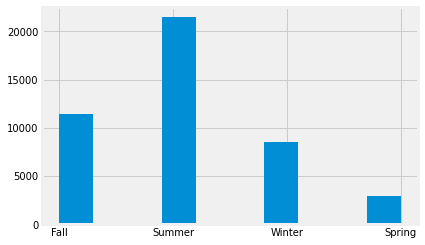

In [ ]:
df_product['season'].hist()

In [ ]:
df_product['season'].fillna(method='pad', inplace = True)

In [ ]:
df_product.isna().sum()

product_id              0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour              0
season                  0
year                    0
usage                 317
productDisplayName      7
dtype: int64

### Replace missing value pada kolom usage menggunakan data sebelumnya

In [ ]:
usage_size = df_product['usage'].isna().mean()*100
print ('Presentase Missing Value: {:.2f}%'.format(usage_size))

Presentase Missing Value: 0.71%


In [ ]:
df_product['usage'].value_counts()

Casual          34406
Sports           4024
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: usage, dtype: int64

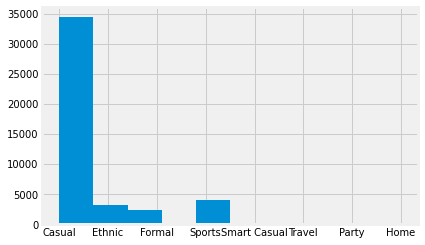

In [ ]:
df_product['usage'].hist()

In [ ]:
df_product['usage'].fillna(method='pad', inplace = True)

In [ ]:
df_product.isna().sum()

product_id            0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    7
dtype: int64

### Drop missing value pada productDisplayName

In [ ]:
df_product['productDisplayName'].unique()

array(['Turtle Check Men Navy Blue Shirt',
       'Peter England Men Party Blue Jeans', 'Titan Women Silver Watch',
       ..., "Lotto Men's Soccer Track Flip Flop",
       'Puma Men Graphic Stellar Blue Tshirt',
       'Fossil Women Pink Dial Chronograph Watch ES3050'], dtype=object)

In [ ]:
df_product.dropna(subset=['productDisplayName'], inplace = True)
df_product.isna().sum()

product_id            0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

###Clean df_clickstream (belum)

In [ ]:
df_clickstream.isna().any()

session_id        False
event_name        False
event_time        False
event_id          False
traffic_source    False
event_metadata     True
dtype: bool

In [ ]:
df_clickstream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB


In [ ]:
df_clickstream['event_time'] = pd.to_datetime(df_clickstream['event_time'])

In [ ]:
df_clickstream['date'] = df_clickstream['event_time'].dt.strftime('%d-%m-%Y')

In [ ]:
df_clickstream['month_year'] = df_clickstream['event_time'].dt.strftime('%m-%Y')

In [ ]:
df_clickstream.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata,date,month_year
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 15:54:32.821085+00:00,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,06-09-2019,09-2019
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06 16:03:57.821085+00:00,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,06-09-2019,09-2019
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01 12:05:10.322763+00:00,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,01-09-2019,09-2019
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763+00:00,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri...",01-09-2019,09-2019
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431+00:00,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'},01-09-2019,09-2019


In [ ]:
#df_clickstream['event_metadata'].apply(lambda x: yaml.load(x, yaml.Loader)).explode().apply(pd.Series)
#df_clickstream['event_metadata'].str.split(' ').apply(pd.Series, 1).stack()
df_clickstream['event_metadata'].value_counts()

{'payment_status': 'Success'}                                 815962
{'search_keywords': 'Dress Kondangan'}                        256194
{'search_keywords': 'Tas Wanita'}                             128790
{'search_keywords': 'Bekas'}                                  112269
{'search_keywords': 'T-Shirt'}                                100087
                                                               ...  
{'product_id': 50741, 'quantity': 1, 'item_price': 467359}         1
{'product_id': 53652, 'quantity': 1, 'item_price': 490195}         1
{'product_id': 53067, 'quantity': 1, 'item_price': 217455}         1
{'product_id': 14817, 'quantity': 1, 'item_price': 485053}         1
{'product_id': 19820, 'quantity': 1, 'item_price': 88918}          1
Name: event_metadata, Length: 2006748, dtype: int64

#Exploratory Data Analysis


###Presentase pembayaran yang sukses dan tidak sukses

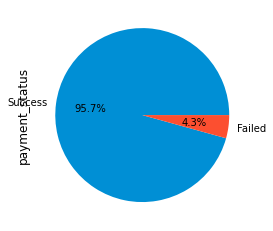

In [ ]:
df_transactions['payment_status'].value_counts().plot.pie(autopct='%1.1f%%')

###Mengecek untuk sukses dan tidak suksesnya pembayaran pada tiap metode pembayaran

In [ ]:
method_succes = df_transactions.groupby(['payment_method','payment_status'])['payment_status'].count()
method_succes

payment_method  payment_status
Credit Card     Failed             12894
                Success           286692
Debit Card      Failed              5958
                Success           131311
Gopay           Failed              7387
                Success           163947
LinkAja         Failed              3323
                Success            72006
OVO             Failed              7058
                Success           162008
Name: payment_status, dtype: int64

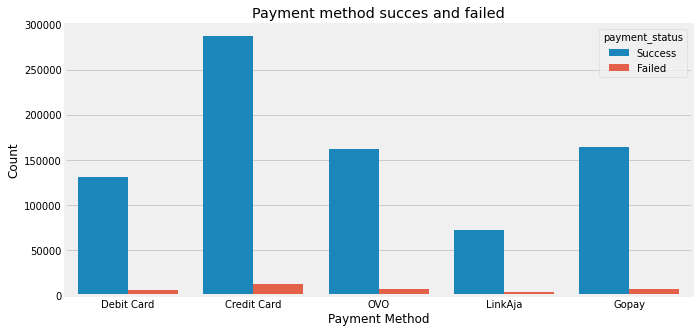

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='payment_method',hue='payment_status',data=df_transactions)
plt.title('Payment method succes and failed')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

###Mencari tau tingkat metode pembayaran yang digunakan oleh customer

In [ ]:
df_transactions['payment_method'].value_counts()

Credit Card    299586
Gopay          171334
OVO            169066
Debit Card     137269
LinkAja         75329
Name: payment_method, dtype: int64

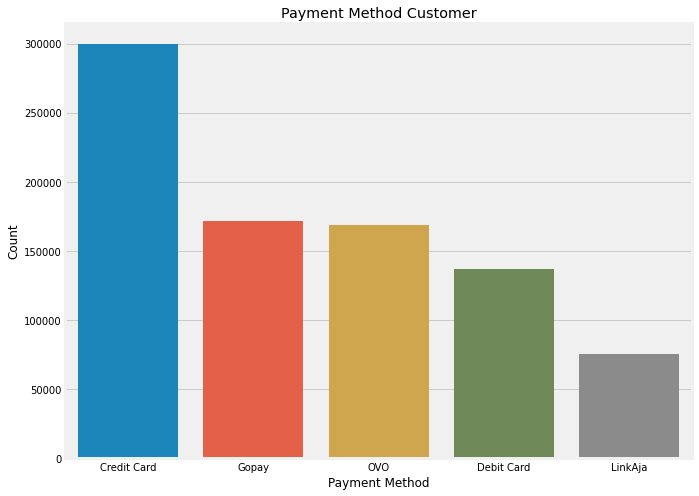

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='payment_method', data=df_transactions, order=df_transactions['payment_method'].value_counts().index)
plt.title('Payment Method Customer')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

###Mencari tau kategori barang-barang yang sering dibeli dan tidak sering dibeli dari setiap kalangan gender yang ada

In [ ]:
product_buy_max = df_product.groupby(['gender','masterCategory'])['masterCategory'].count()
product_buy_max

gender  masterCategory
Boys    Accessories          17
        Apparel             759
        Footwear             54
Girls   Accessories          28
        Apparel             567
        Footwear             60
Men     Accessories        4412
        Apparel           11351
        Footwear           5751
        Free Items           53
        Personal Care       579
Unisex  Accessories        1497
        Apparel              96
        Footwear            518
        Free Items            9
        Home                  1
        Personal Care        15
        Sporting Goods       25
Women   Accessories        5320
        Apparel            8623
        Footwear           2836
        Free Items           43
        Personal Care      1809
Name: masterCategory, dtype: int64

###Mencari tau tingkat pembelian tiap kalangan gender tiap seasonnya

In [ ]:
product_season = df_product.groupby(['gender','season'])['season'].count()
product_season

gender  season
Boys    Fall        113
        Spring        6
        Summer      691
        Winter       20
Girls   Fall         81
        Spring        3
        Summer      536
        Winter       35
Men     Fall       7073
        Spring      965
        Summer    10878
        Winter     3230
Unisex  Fall        506
        Spring       99
        Summer      939
        Winter      617
Women   Fall       3662
        Spring     1911
        Summer     8438
        Winter     4620
Name: season, dtype: int64

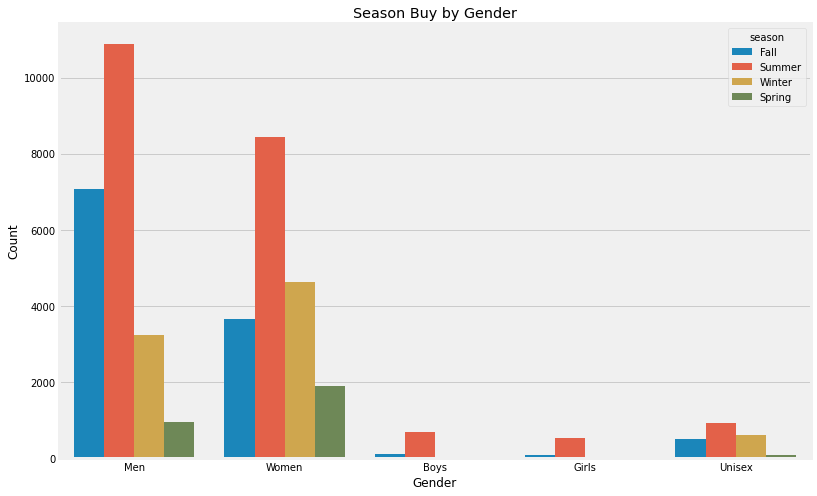

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='gender',hue='season',data=df_product)
plt.title('Season Buy by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

###Menentukan presentase pengguna antara laki-laki dan perempuan

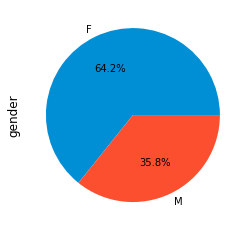

In [ ]:
df_customer['gender'].value_counts().plot.pie(autopct='%1.1f%%')

###Presentase device yang digunakan oleh para customer dalam melakukan pembelian

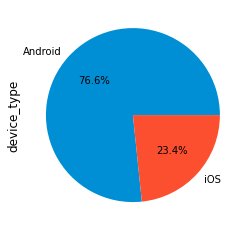

In [ ]:
df_customer['device_type'].value_counts().plot.pie(autopct='%1.1f%%')

###Mengecek Dari mana saja lokasi customer dan tingkatannya

In [ ]:
df_customer['home_location'].value_counts()

Jakarta Raya           18715
Jawa Barat             11486
Jawa Tengah            10960
Jawa Timur              9953
Yogyakarta              7849
Kalimantan Barat        5603
Lampung                 5426
Kalimantan Selatan      4229
Kalimantan Tengah       4091
Kalimantan Timur        2729
Maluku                  2490
Kepulauan Riau          1902
Bali                    1451
Sumatera Barat          1346
Nusa Tenggara Barat     1324
Sulawesi Utara          1279
Sulawesi Barat          1068
Sumatera Utara          1004
Sumatera Selatan         841
Papua                    753
Sulawesi Selatan         726
Papua Barat              660
Bengkulu                 654
Nusa Tenggara Timur      587
Sulawesi Tengah          505
Jambi                    385
Banten                   377
Maluku Utara             368
Gorontalo                348
Aceh                     263
Bangka Belitung          250
Sulawesi Tenggara        246
Riau                     132
Name: home_location, dtype: int64

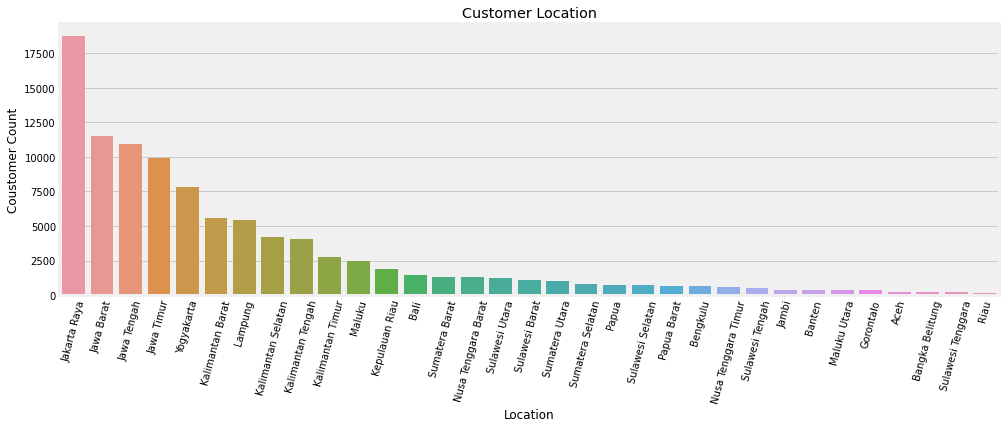

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='home_location', data=df_customer, order=df_customer['home_location'].value_counts().index)
plt.title('Customer Location')
plt.xlabel('Location')
plt.ylabel('Coustomer Count')
plt.xticks(rotation = 75)
plt.show()

###Mengecek tingkat aktivitas pada traffic yang ada

In [ ]:
traffic_event = df_clickstream.groupby(['traffic_source','event_name'])['event_name'].count()
traffic_event

traffic_source  event_name 
MOBILE          ADD_PROMO       293838
                ADD_TO_CART    1743476
                BOOKING         767254
                CLICK          2247457
                HOMEPAGE       2237231
                ITEM_DETAIL    1161552
                PROMO_PAGE      544252
                SCROLL         1497180
                SEARCH         1056064
WEB             ADD_PROMO        32697
                ADD_TO_CART     193681
                BOOKING          85328
                CLICK           250581
                HOMEPAGE        249895
                ITEM_DETAIL     128844
                PROMO_PAGE       60679
                SCROLL          166391
                SEARCH          117202
Name: event_name, dtype: int64

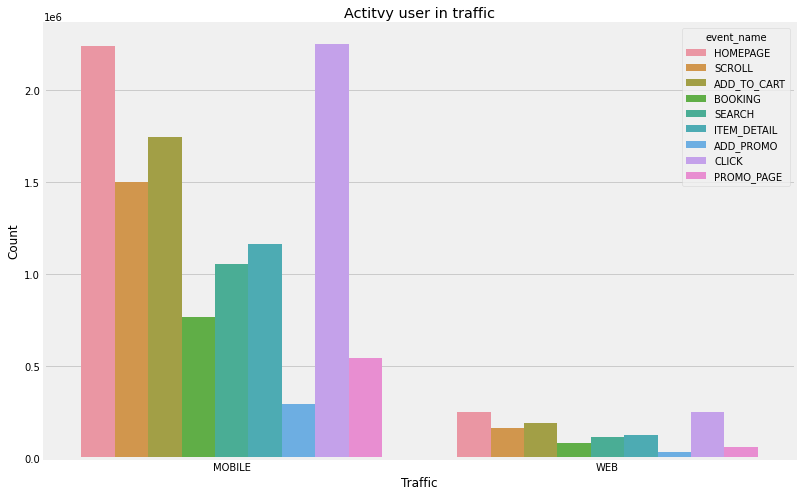

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='traffic_source',hue='event_name',data=df_clickstream)
plt.title('Actitvy user in traffic')
plt.xlabel('Traffic')
plt.ylabel('Count')
plt.show()

###Mencari platform yang digunakan user

In [ ]:
traffic_source_count = df_clickstream.groupby(['traffic_source'])['traffic_source'].count()
traffic_source_count

traffic_source
MOBILE    11548304
WEB        1285298
Name: traffic_source, dtype: int64

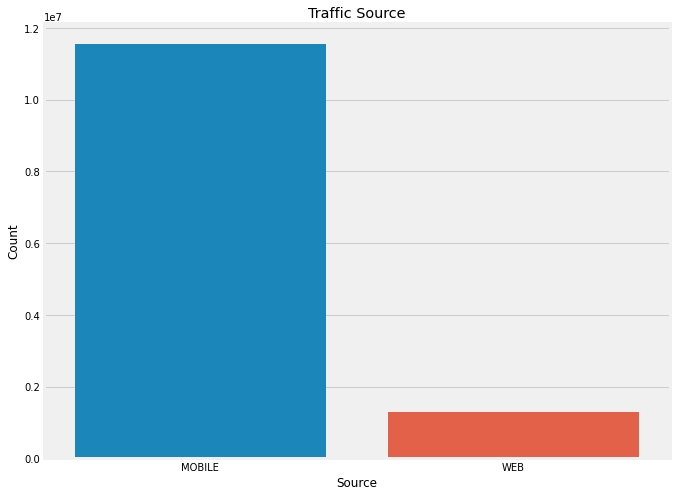

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='traffic_source', data=df_clickstream, order=df_clickstream['traffic_source'].value_counts().index)
plt.title('Traffic Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

###Gender yang sering pake

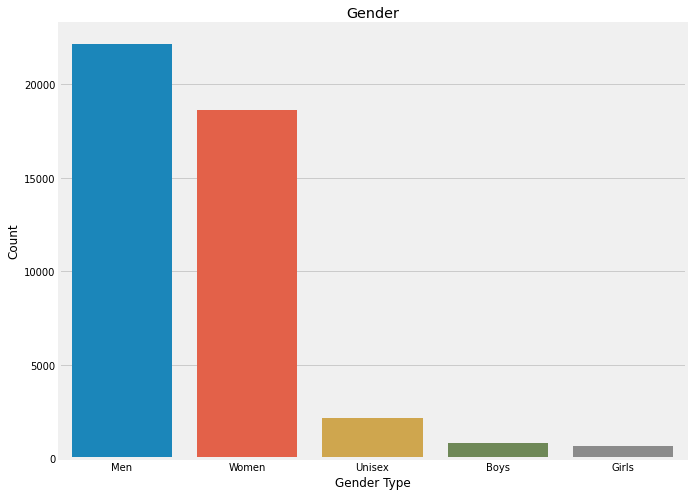

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='gender', data=df_product, order=df_product['gender'].value_counts().index)
plt.title('Gender')
plt.xlabel('Gender Type')
plt.ylabel('Count')
plt.show()

### Tingkat promo code yang sering dipake

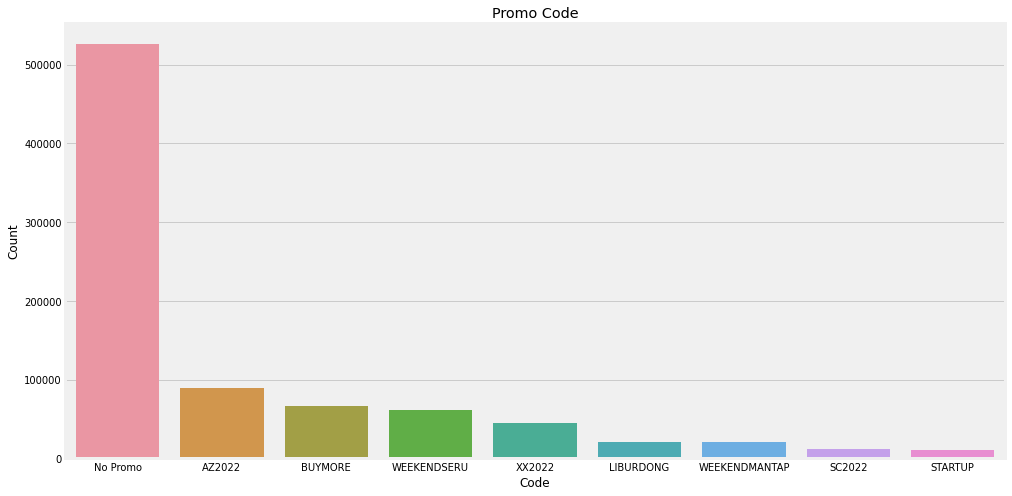

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='promo_code', data=df_transactions, order=df_transactions['promo_code'].value_counts().index)
plt.title('Promo Code')
plt.xlabel('Code')
plt.ylabel('Count')
plt.show()

### Tingkat Master Category

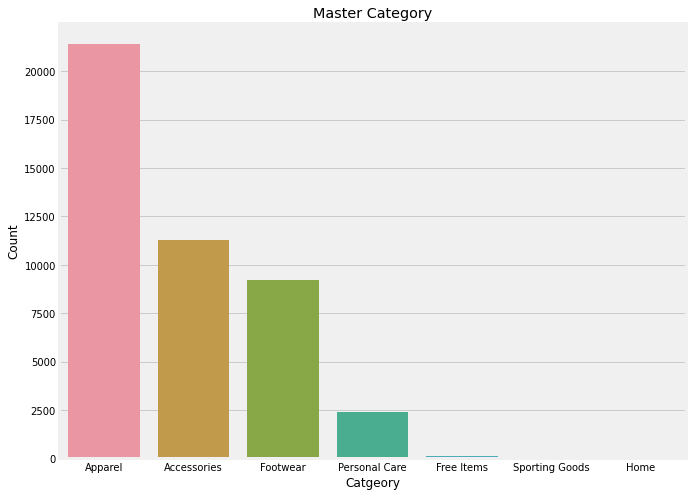

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='masterCategory', data=df_product, order=df_product['masterCategory'].value_counts().index)
plt.title('Master Category')
plt.xlabel('Catgeory')
plt.ylabel('Count')
plt.show()

### 10 SubCategory Teratas

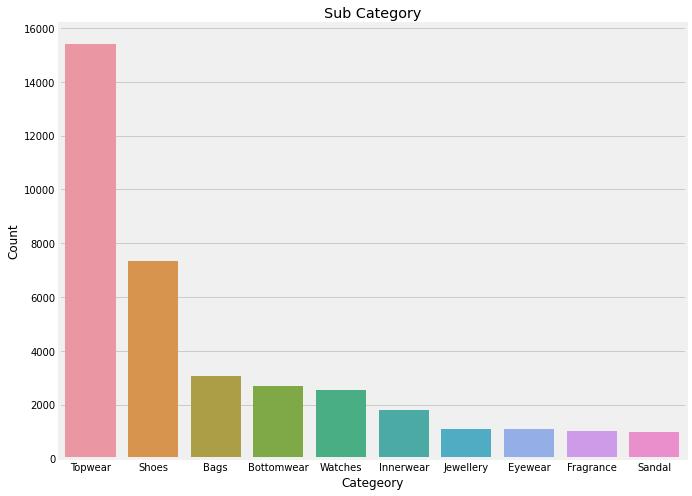

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='subCategory', data=df_product, order=df_product['subCategory'].value_counts().head(10).index)
plt.title('Sub Category')
plt.xlabel('Categeory')
plt.ylabel('Count')
plt.show()

### 5 Type Teratas

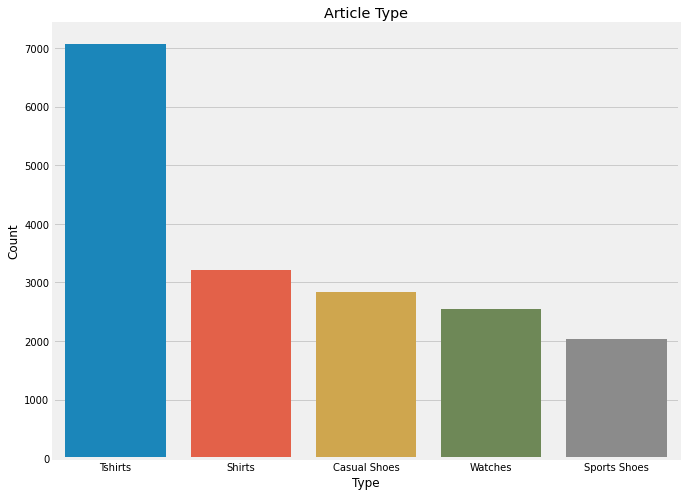

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='articleType', data=df_product, order=df_product['articleType'].value_counts().head(5).index)
plt.title('Article Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

###Menguraikan event_metadata pada table click_stream agar mendapatkan insights

In [ ]:
clickstream_emcleaned = df_clickstream[df_clickstream['event_metadata'].notna()]
clickstream_emcleaned.head()

,session_id,event_name,event_time,event_id,traffic_source,event_metadata,date,month_year
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763+00:00,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri...",01-09-2019,09-2019
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431+00:00,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'},01-09-2019,09-2019
5,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09-01 12:07:00.322763+00:00,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,MOBILE,{'search_keywords': 'Dress Kondangan'},01-09-2019,09-2019
12,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:06:03.425431+00:00,c1b42157-39a7-4521-a4dc-ed0200de301a,MOBILE,"{'product_id': 6133, 'quantity': 2, 'item_pric...",09-09-2019,09-2019
13,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,ADD_TO_CART,2019-09-09 05:23:36.425431+00:00,61cbe834-c585-406e-8eac-30f671e51fbb,MOBILE,"{'product_id': 6721, 'quantity': 1, 'item_pric...",09-09-2019,09-2019


In [ ]:
length_full = len(clickstream_emcleaned['event_metadata'])
array = clickstream_emcleaned['event_metadata'].unique()
print(array)
print("unique values= " + str(len(array)) + " of " + str(length_full))

["{'product_id': 15315, 'quantity': 4, 'item_price': 313529}"
 "{'payment_status': 'Success'}" "{'search_keywords': 'Dress Kondangan'}"
 ... "{'product_id': 19386, 'quantity': 1, 'item_price': 208644}"
 "{'product_id': 13143, 'quantity': 1, 'item_price': 284949}"
 "{'product_id': 19820, 'quantity': 1, 'item_price': 88918}"]
unique values= 2006748 of 4289540


In [ ]:
event_search = clickstream_emcleaned[clickstream_emcleaned['event_name'] == 'SEARCH']
event_search

,session_id,event_name,event_time,event_id,traffic_source,event_metadata,date,month_year
5,7d440441-e67a-4d36-b324-80ffd636d166,SEARCH,2019-09-01 12:07:00.322763+00:00,c952142b-4fe9-4694-ad7f-21a5d1bed9ca,MOBILE,{'search_keywords': 'Dress Kondangan'},01-09-2019,09-2019
22,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09-09 05:06:26.425431+00:00,65ad97d0-9207-447e-b09d-fcc00a569824,MOBILE,{'search_keywords': 'Tas Wanita'},09-09-2019,09-2019
35,f7b5cd60-4f87-4b3c-8bde-c7da8930eec2,SEARCH,2019-09-09 08:50:27.425431+00:00,a2e93548-18b5-4a79-b74f-42bbc0cf0fbd,MOBILE,{'search_keywords': 'Celana Panjang'},09-09-2019,09-2019
57,98e66f53-f24f-4238-8c9c-34a0482e22d5,SEARCH,2019-10-02 17:17:08.425431+00:00,bf6963cd-b681-4763-b796-ce18d3b9004f,MOBILE,{'search_keywords': 'Kaos'},02-10-2019,10-2019
59,98e66f53-f24f-4238-8c9c-34a0482e22d5,SEARCH,2019-10-02 21:07:33.425431+00:00,cf5d38ae-7f44-4166-9cf9-c43fb57b8f3a,MOBILE,{'search_keywords': 'Sepatu'},02-10-2019,10-2019
...,...,...,...,...,...,...,...,...
12833585,f38416ce-51f2-46b0-a476-776d8fed1cb0,SEARCH,2021-08-01 08:03:07.737783+00:00,4e527503-27e3-4cbc-8964-23896c34fa96,WEB,{'search_keywords': 'Sepatu Adidas'},01-08-2021,08-2021
12833589,c1ce86f6-858b-4009-af5b-f1483a28d020,SEARCH,2020-09-22 22:44:59.674560+00:00,cbc4e8e5-aa48-40c6-8e69-07382e1d35bc,WEB,{'search_keywords': 'Barang Bekas'},22-09-2020,09-2020
12833593,f5c4bbe0-f977-45bb-af23-6ab524df7777,SEARCH,2022-04-09 21:01:31.132472+00:00,086302b8-62ba-4ce6-8cdc-9924c92176fc,MOBILE,{'search_keywords': 'Baju'},09-04-2022,04-2022
12833597,ad1063b0-a6e5-40a9-aed6-d1b45741e571,SEARCH,2021-06-07 04:37:53.354381+00:00,4b3b91a5-9bda-44de-87dc-153367071dfc,MOBILE,{'search_keywords': 'Bekas'},07-06-2021,06-2021


In [ ]:
search = clickstream_emcleaned[clickstream_emcleaned['event_name'] == 'SEARCH'][['event_metadata']]
search.set_index('event_metadata', inplace = True)
search.head()

""
event_metadata
{'search_keywords': 'Dress Kondangan'}
{'search_keywords': 'Tas Wanita'}
{'search_keywords': 'Celana Panjang'}
{'search_keywords': 'Kaos'}
{'search_keywords': 'Sepatu'}


In [ ]:
search_list = []

for index, value in search.iterrows():
    search_list.append(index)

#search_list

In [ ]:
import ast
search_list_clean=[]
for i in search_list:
    search_list_clean.append(ast.literal_eval(i))
search_list_clean

[{'search_keywords': 'Dress Kondangan'},
 {'search_keywords': 'Tas Wanita'},
 {'search_keywords': 'Celana Panjang'},
 {'search_keywords': 'Kaos'},
 {'search_keywords': 'Sepatu'},
 {'search_keywords': 'Dress Kondangan'},
 {'search_keywords': 'Tas Kerja'},
 {'search_keywords': 'T-Shirt'},
 {'search_keywords': 'Topi'},
 {'search_keywords': 'Bekas'},
 {'search_keywords': 'T-Shirt'},
 {'search_keywords': 'Topi'},
 {'search_keywords': 'Tas Kerja'},
 {'search_keywords': 'Dress Kondangan'},
 {'search_keywords': 'Baju'},
 {'search_keywords': 'Thrift'},
 {'search_keywords': 'T-Shirt'},
 {'search_keywords': 'Sepatu Nike'},
 {'search_keywords': 'Sepatu Nike'},
 {'search_keywords': 'Bekas'},
 {'search_keywords': 'Dress Pesta'},
 {'search_keywords': 'Tas Wanita'},
 {'search_keywords': 'Bekas'},
 {'search_keywords': 'Kaos'},
 {'search_keywords': 'Baju'},
 {'search_keywords': 'Bekas'},
 {'search_keywords': 'Sepatu Adidas'},
 {'search_keywords': 'Kaos'},
 {'search_keywords': 'Bekas'},
 {'search_keyword

##Mencari kata kunci yang sering dicari oleh customer

In [ ]:
df_search = pd.DataFrame(search_list_clean)
df_search = df_search.groupby('search_keywords', as_index = True).agg({'search_keywords':'count'})
df_search.rename(columns = {'search_keywords':'total_keyword'}, inplace = True)
df_search.reset_index(inplace = True)
df_search.sort_values('total_keyword', ascending = False, inplace = True, ignore_index = True)
df_search

,search_keywords,total_keyword
0,Dress Kondangan,256194
1,Tas Wanita,128790
2,Bekas,112269
3,T-Shirt,100087
4,Baju,83873
5,Kaos,83759
6,Dress Pesta,76829
7,Sepatu Nike,51578
8,Tas Kerja,38677
9,Second Hand,28429


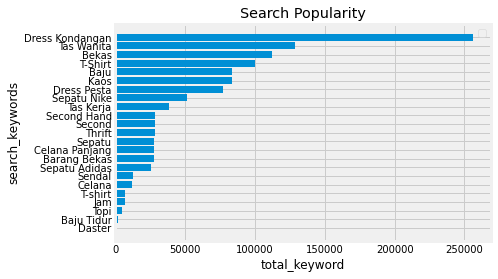

In [ ]:
plt.barh('search_keywords', 'total_keyword', data = df_search.sort_values('total_keyword', ascending = True, ignore_index = True))

plt.xlabel('total_keyword')
plt.ylabel('search_keywords')

plt.title('Search Popularity')

plt.legend()

plt.show()

In [ ]:
atc = clickstream_emcleaned[clickstream_emcleaned['event_name'] == 'ADD_TO_CART'][['event_metadata']]
atc.set_index('event_metadata', inplace = True)
atc.head()

""
event_metadata
"{'product_id': 15315, 'quantity': 4, 'item_price': 313529}"
"{'product_id': 6133, 'quantity': 2, 'item_price': 249443}"
"{'product_id': 6721, 'quantity': 1, 'item_price': 134504}"
"{'product_id': 57622, 'quantity': 1, 'item_price': 384716}"
"{'product_id': 5490, 'quantity': 1, 'item_price': 121318}"


In [ ]:
atc_list = []

for index, value in atc.iterrows():
    atc_list.append(index)

atc_list

["{'product_id': 15315, 'quantity': 4, 'item_price': 313529}",
 "{'product_id': 6133, 'quantity': 2, 'item_price': 249443}",
 "{'product_id': 6721, 'quantity': 1, 'item_price': 134504}",
 "{'product_id': 57622, 'quantity': 1, 'item_price': 384716}",
 "{'product_id': 5490, 'quantity': 1, 'item_price': 121318}",
 "{'product_id': 21304, 'quantity': 1, 'item_price': 209086}",
 "{'product_id': 12106, 'quantity': 1, 'item_price': 184033}",
 "{'product_id': 59647, 'quantity': 1, 'item_price': 311267}",
 "{'product_id': 24105, 'quantity': 1, 'item_price': 216070}",
 "{'product_id': 22681, 'quantity': 1, 'item_price': 496501}",
 "{'product_id': 25875, 'quantity': 4, 'item_price': 287362}",
 "{'product_id': 4790, 'quantity': 1, 'item_price': 262894}",
 "{'product_id': 30881, 'quantity': 1, 'item_price': 88678}",
 "{'product_id': 41867, 'quantity': 1, 'item_price': 261447}",
 "{'product_id': 9785, 'quantity': 1, 'item_price': 131301}",
 "{'product_id': 21330, 'quantity': 1, 'item_price': 104384}"

In [ ]:
atc_list_clean=[]
for i in atc_list:
    atc_list_clean.append(ast.literal_eval(i))
atc_list_clean

[{'product_id': 15315, 'quantity': 4, 'item_price': 313529},
 {'product_id': 6133, 'quantity': 2, 'item_price': 249443},
 {'product_id': 6721, 'quantity': 1, 'item_price': 134504},
 {'product_id': 57622, 'quantity': 1, 'item_price': 384716},
 {'product_id': 5490, 'quantity': 1, 'item_price': 121318},
 {'product_id': 21304, 'quantity': 1, 'item_price': 209086},
 {'product_id': 12106, 'quantity': 1, 'item_price': 184033},
 {'product_id': 59647, 'quantity': 1, 'item_price': 311267},
 {'product_id': 24105, 'quantity': 1, 'item_price': 216070},
 {'product_id': 22681, 'quantity': 1, 'item_price': 496501},
 {'product_id': 25875, 'quantity': 4, 'item_price': 287362},
 {'product_id': 4790, 'quantity': 1, 'item_price': 262894},
 {'product_id': 30881, 'quantity': 1, 'item_price': 88678},
 {'product_id': 41867, 'quantity': 1, 'item_price': 261447},
 {'product_id': 9785, 'quantity': 1, 'item_price': 131301},
 {'product_id': 21330, 'quantity': 1, 'item_price': 104384},
 {'product_id': 18926, 'quanti

In [ ]:
df_atc = pd.DataFrame(atc_list_clean)
df_atc = df_atc.groupby('product_id', as_index = True).agg({'quantity':'count'})
df_atc.rename(columns = {'quantity':'total_product_added'}, inplace = True)

df_atc.reset_index(inplace = True)
df_atc.sort_values('total_product_added', ascending = False, inplace = True, ignore_index = True)
df_atc

,product_id,total_product_added
0,14804,131
1,8346,131
2,39631,128
3,3549,127
4,47600,126
...,...,...
44441,31585,11
44442,37594,11
44443,32168,11
44444,16206,10


In [ ]:
df_atc['product_id'] = df_atc['product_id'].apply(str)
df_atc_top = df_atc.head(20)
product_id_list = df_atc.product_id.values.tolist()

In [ ]:
df_productname = df_product.drop(columns =['gender', 'masterCategory','articleType','baseColour','subCategory','season','year','usage'])
df_productname['product_id'] = df_productname['product_id'].apply(str)

In [ ]:
topnames = df_productname.loc[df_productname['product_id'].isin(product_id_list)]
atc_names = pd.merge(topnames,df_atc_top, on = 'product_id')
atc_names

,product_id,productDisplayName,total_product_added
0,21543,Kiara Women Small Pocket Black Handbag,123
1,14804,United Colors of Benetton Women Solid Black Ha...,131
2,8346,ADIDAS Men Slimsoll White Sports Shoes,131
3,39631,Nike Men T-Lite White Sports Shoes,128
4,7217,Rockport Men Carnforth Soft Black Shoe,123
5,15251,ADIDAS Originals Men Vespa Pk Mid Black Casual...,120
6,52576,Mod'acc Women Purple Clutch,121
7,35425,ADIDAS Men Twenty2yds Mid IV White Sports Shoes,121
8,10731,Murcia Women Lorra Coffee Brown Handbags,120
9,47600,Portia Women Maroon Flats,126


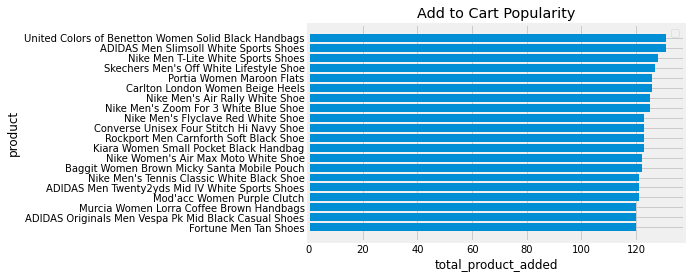

In [ ]:
plt.barh('productDisplayName', 'total_product_added', data = atc_names.sort_values('total_product_added', ascending = True, ignore_index = True))

plt.xlabel('total_product_added')
plt.ylabel('product')

plt.title('Add to Cart Popularity')

plt.legend()

plt.show()

In [ ]:
df_atc_bottom = df_atc.tail(20)
atc_names_bottom = pd.merge(topnames,df_atc_bottom, on = 'product_id')

atc_names_bottom

,product_id,productDisplayName,total_product_added
0,17584,ADIDAS Unisex Pack of 3 Crew Socks,12
1,24533,Mother Earth Women Pink Printed Kurta,9
2,14736,Arrow Men Solid White Shirts,12
3,33374,Baggit Women Maroon Wallet,12
4,16206,Puma Men Hazard Green TShirt,10
5,19191,United Colors of Benetton Men Charcoal Shirt,11
6,19138,Lotto Men Sting Black Sandals,12
7,33206,Sepia Women Printed Green T-shirt,12
8,58334,Lotto Men Purple Flip Flops,12
9,21397,Locomotive Men Printed White T-shirt,12


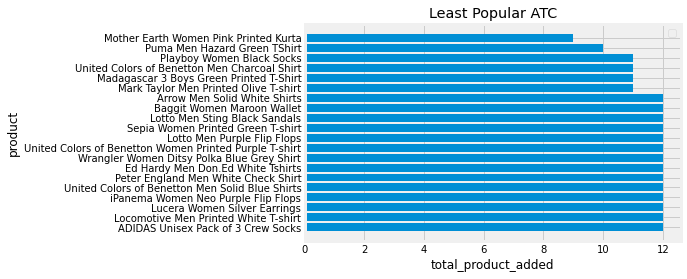

In [ ]:
plt.barh('productDisplayName', 'total_product_added', data = atc_names_bottom.sort_values('total_product_added', ascending = False, ignore_index = True))

plt.xlabel('total_product_added')
plt.ylabel('product')

plt.title('Least Popular ATC')

plt.legend()

plt.show()